In [1]:
tx_id = 'NM_001032386.2'
protein_id = 'NP_001027558.1'

In [2]:
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(tx_id)

In [3]:
from genophenocorr.preprocessing import UniprotProteinMetadataService

pms = UniprotProteinMetadataService()

protein_metas = pms.annotate(protein_id)

assert len(protein_metas) == 1
protein_meta = protein_metas[0]

In [4]:
import hpotk
import os
from genophenocorr.preprocessing import load_phenopacket_folder
from genophenocorr.preprocessing import configure_caching_patient_creator
from hpotk.validate import ValidationRunner
from hpotk.validate import ObsoleteTermIdsValidator, PhenotypicAbnormalityValidator, AnnotationPropagationValidator

fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

validation_runner = ValidationRunner(
    validators=(
        ObsoleteTermIdsValidator(hpo),
        PhenotypicAbnormalityValidator(hpo),
        AnnotationPropagationValidator(hpo)
    ))

pc = configure_caching_patient_creator(hpo, validation_runner=validation_runner)

fpath_suox_cohort = os.path.join(os.getcwd(), os.pardir, 'notebooks', 'SUOX', 'phenopackets')
cohort = load_phenopacket_folder(fpath_suox_cohort, pc)
f'Loaded {len(cohort)} samples'

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 684.10it/s]


'Loaded 35 samples'

[[56002399 56002402]
 [56002423 56002426]
 [56002501 56002504]
 [56002570 56002573]
 [56002618 56002624]
 [56002645 56002648]
 [56002648 56002651]
 [56002693 56002696]
 [56002738 56002741]
 [56002867 56002870]
 [56002948 56002954]
 [56002990 56002993]
 [56003011 56003014]
 [56003020 56003023]
 [56003101 56003104]
 [56003302 56003305]
 [56003314 56003317]
 [56003344 56003347]
 [56003353 56003356]
 [56003404 56003407]
 [56003416 56003419]
 [56003419 56003422]
 [56003479 56003482]
 [56003497 56003500]
 [56003566 56003569]
 [56003572 56003575]
 [56003593 56003596]
 [56003599 56003602]
 [56003734 56003740]
 [56003761 56003764]]


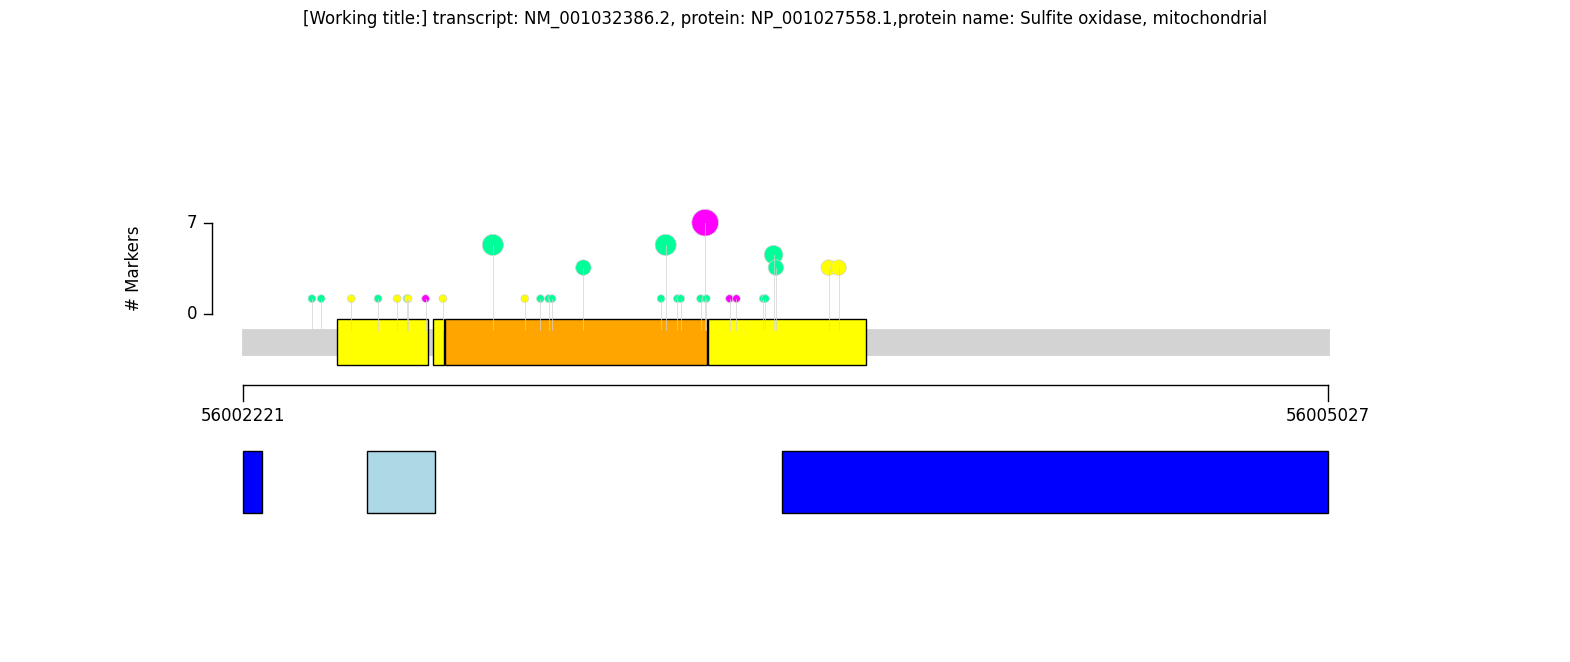

In [5]:
from genophenocorr.view._draw_variants import VariantsVisualizer
viz = VariantsVisualizer()
viz.draw_fig(tx_coordinates, protein_meta, cohort)

In [6]:
print('test')

test
